### Pre-training - feature extraction from VGG16 for cats_vs_dogs small dataset

In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.


In [2]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

W1018 18:10:44.958175  9196 deprecation_wrapper.py:119] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1018 18:10:45.003656  9196 deprecation_wrapper.py:119] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 18:10:45.008651  9196 deprecation_wrapper.py:119] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1018 18:10:45.145116  9196 deprecation_wrapper.py:119] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
train_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\train'
val_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\validation'
test_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\test'

In [4]:
# extract features from dataset
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape= (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >=sample_count:
            break
    return features,labels

In [5]:
train_features, train_labels = extract_features(train_dir,2000)
val_features, val_labels = extract_features(val_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)

train_features = np.reshape(train_features, (2000,4*4*512))
val_features = np.reshape(val_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

W1018 19:12:09.196348  9196 deprecation.py:506] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

W1018 19:12:09.282294  9196 deprecation_wrapper.py:119] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1018 19:12:09.298285  9196 deprecation.py:323] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(val_features,val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6115 - acc: 0.6650 - val_loss: 0.4446 - val_acc: 0.8420
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4361 - acc: 0.8010 - val_loss: 0.3645 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3552 - acc: 0.8480 - val_loss: 0.3214 - val_acc: 0.8790 loss: 0.3518 - acc: 0.85 - ETA: 0s - loss: 0.3517 - acc: 0
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3133 - acc: 0.8710 - val_loss: 0.2996 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2831 - acc: 0.8845 - val_loss: 0.2835 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2675 - acc: 0.8915 - val_loss: 0.2743 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2494 - acc:

In [10]:
model.save('feature extraction using VGG16.h5')

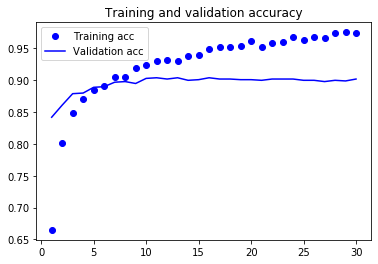

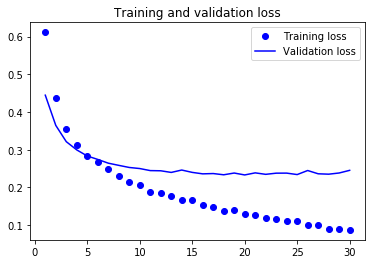

In [12]:
#visualize accuracy and loss during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
print('validation accuracy:',val_acc)

validation accuracy: [0.8419999980926514, 0.8609999990463257, 0.8789999985694885, 0.8799999988079071, 0.8889999973773957, 0.8899999988079071, 0.8969999969005584, 0.8979999983310699, 0.8949999976158142, 0.902999997138977, 0.9039999985694885, 0.9019999992847443, 0.9039999985694885, 0.8999999976158142, 0.9010000002384185, 0.9039999973773957, 0.9020000004768371, 0.9019999992847443, 0.9010000002384185, 0.9009999978542328, 0.9000000011920929, 0.9019999992847443, 0.9019999992847443, 0.9019999992847443, 0.8999999988079072, 0.8999999976158142, 0.8979999995231629, 0.8999999988079072, 0.8989999997615814, 0.9019999980926514]
